___


# <font color= #90546f> **Proyecto Taller de Modelado de Datos** </font>
- <Strong> `ESTEBAN GÓMEZ, AISSA GONZALEZ Y SARAH BELTRAN` </Strong>
- <Strong> Año </Strong>: 2024
___



## <font color= #90546f> **Proyecto Regresión** </font>
#### <font color= #90546f> California Housing Sklearn Dataset </font>


Fuente del Dataset:
Scikitlearn California Housing[Dataset]. Sklearn Repository https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_california_housing.html 




## <font color= ##28af2e> Definición del problema </font>




### <font color= ##28af2e> Introducción </font>

<p style="text-align: justify;">
El California Housing Prices Dataset contiene información sobre viviendas en California, como la ubicación, número de habitaciones, población, ingresos de los hogares y la proximidad al océano. El objetivo principal es predecir el valor medio de una vivienda en diferentes áreas geográficas.
</p>

### <font color= ##28af2e> Objetivo </font>

<p style="text-align: justify;">
El objetivo del proyecto es predecir el valor medio de las viviendas en diferentes áreas de California utilizando características socioeconómicas y geográficas como los ingresos de los hogares, número de habitaciones, población y proximidad al océano. Esta predicción permitirá identificar patrones que expliquen la variabilidad de los precios inmobiliarios, facilitando la toma de decisiones en múltiples sectores. 

Esto nos puede servir en la vida cotidiana si se busca el precio de una vivienda específica en California, esto con el fin de buscar un aproximado de cuanto debería valer alguna propiedad y de cuanto se dispone para comprar o rentar alguna vivienda con características específicas.
</p>

### <font color= ##28af2e> Features </font>


1. Longitude: medida de qué tan al oeste está una casa; un valor más alto está más al oeste.

2. Latitude: medida de qué tan al norte está una casa; un valor más alto está más al norte.

3. Housing MedianAge: Edad media de una casa dentro de una manzana; un número más bajo es un edificio más nuevo.

4. Total Rooms: número total de habitaciones dentro de un bloque.

5. Total Bedrooms: Número total de dormitorios dentro de un bloque.

6. Population: Número total de personas que residen dentro de una cuadra.

7. Households: número total de hogares, un grupo de personas que residen dentro de una unidad residencial, para un bloque.

8. Median income: ingreso medio de los hogares dentro de un bloque de casas (medido en decenas de miles de dólares estadounidenses).

9. Median House Value: valor medio de la vivienda para hogares dentro de un bloque (medido en dólares estadounidenses). (Nuestra variable a predecir)

10. Ocean Proximity: Ubicación de la casa frente al océano o mar.


## <font color= ##28af2e> Entrega 1: Exploración de datos (EDA) </font>
___ 

### <font color= ##28af2e>Carga de Dataset y Librerias</font>

In [790]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [791]:
df = pd.read_csv(r"C:\Users\esteb\OneDrive\Documents\GitHub\Modelado_datos_Valerio\Proyecto\Datos\california_housing.csv")

### <font color= ##28af2e>Exploración de datos</font>

In [792]:
#Dimension de los datos
df.shape

(20640, 10)

In [793]:
# Primeros 5 renglones de la base de datos
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [794]:
ocean_prox = pd.DataFrame(df["ocean_proximity"].value_counts())
ocean_prox = np.array(ocean_prox['count'])
ocean_prox

array([9136, 6551, 2658, 2290,    5], dtype=int64)

De nuestra única variable categórica sacamos la cantidad de veces en que cada respuesta se repite y a continuación creamos una gráfica con el fin de conocer la frecuencia de cada opción.

In [795]:
lugares = df['ocean_proximity'].unique()
lugares

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Text(0, 0.5, 'Conteo')

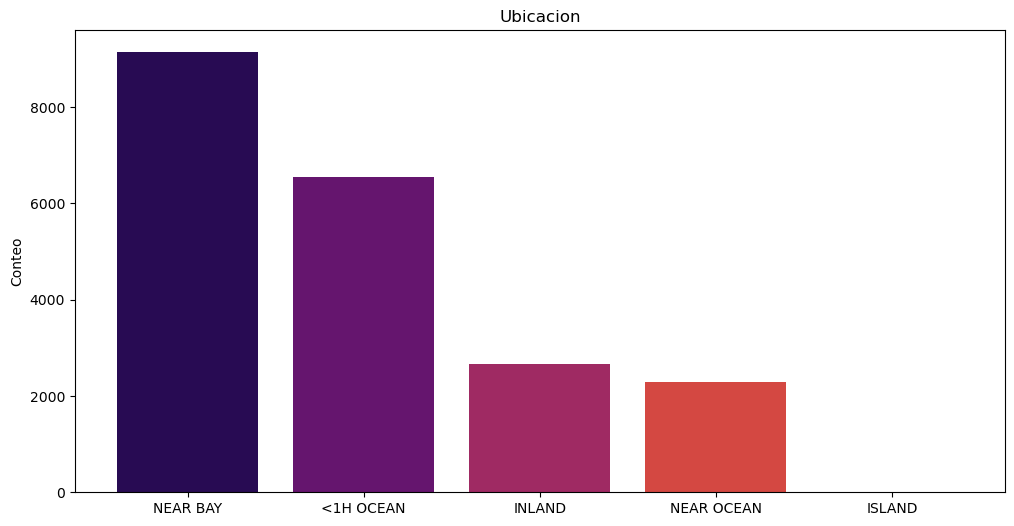

In [796]:
fig, ax = plt.subplots(figsize = (12, 6))

palette = sns.color_palette('inferno')

ax.bar(lugares, ocean_prox, color=palette)
ax.set_title('Ubicacion')
ax.set_ylabel('Conteo')

La variable categórica la convertimos en unas nuevas columnas cada una con un "1" cuando es verdad y un "0" cuando no lo es, por ejemplo si en un registro aparece un "1" en INLAND, quiere decir que ese registro se encuentra en tierra.

In [797]:
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.rename(columns={'ocean_proximity_<1H OCEAN': '<1H_OCEAN'}, inplace = True)
df.rename(columns={'ocean_proximity_INLAND': 'INLAND'}, inplace = True)
df.rename(columns={'ocean_proximity_ISLAND': 'ISLAND'}, inplace = True)
df.rename(columns={'ocean_proximity_NEAR BAY': 'NEAR_BAY'}, inplace = True)
df.rename(columns={'ocean_proximity_NEAR OCEAN': 'NEAR_OCEAN'}, inplace = True)

df[['<1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN', 'ISLAND', 'INLAND']] = df[['<1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN', 'ISLAND', 'INLAND']].astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


A continuación se observa una descripción breve del dataset

In [798]:
# Descripción de los datos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [799]:
def reporte(datos):
    tipos = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Faltantes'])
    uniques = pd.DataFrame(datos.nunique(), columns=['Unicos'])
    max = pd.DataFrame(datos.max(), columns=['Maximos'])
    min = pd.DataFrame(datos.min(), columns=['Minimos'])
    return tipos.join(missing).join(uniques).join(max).join(min)
reporte(df)

,Tipo,Faltantes,Unicos,Maximos,Minimos
longitude,float64,0,844,-114.3100,-124.3500
latitude,float64,0,862,41.9500,32.5400
housing_median_age,int64,0,52,52.0000,1.0000
total_rooms,int64,0,5926,39320.0000,2.0000
total_bedrooms,float64,207,1923,6445.0000,1.0000
population,int64,0,3888,35682.0000,3.0000
households,int64,0,1815,6082.0000,1.0000
median_income,float64,0,12928,15.0001,0.4999
median_house_value,int64,0,3842,500001.0000,14999.0000
<1H_OCEAN,int32,0,2,1.0000,0.0000


Text(0, 0.5, 'Frecuencia')

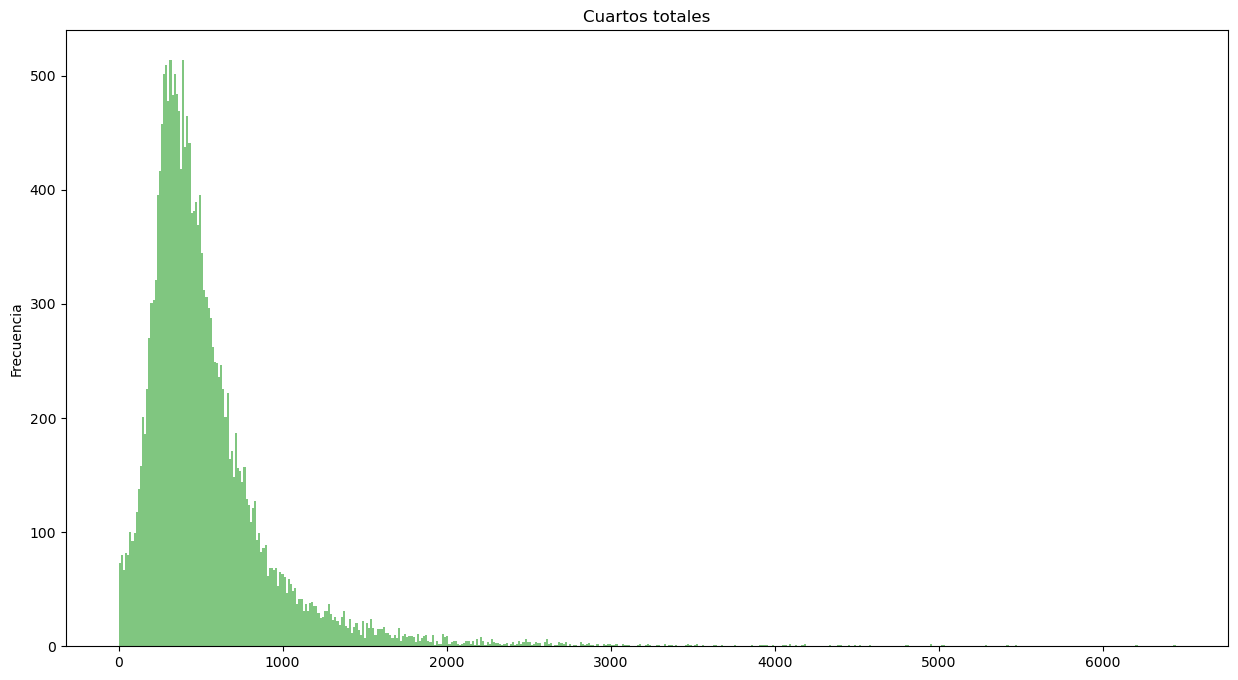

In [800]:
# Eliminación de los nulos
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(x = 'total_bedrooms', bins=500, data=df, color='C2', alpha=0.6)
ax.set_title('Cuartos totales')
ax.set_ylabel('Frecuencia')

Eliminamos los nulos ya que son muy pocos los nulos comparados al total de los registros

In [801]:
df = df.dropna(subset = ['total_bedrooms'])

In [802]:
df['total_bedrooms'].isna().sum()

0

### <font color= ##28af2e>Valores atípicos</font>

In [803]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


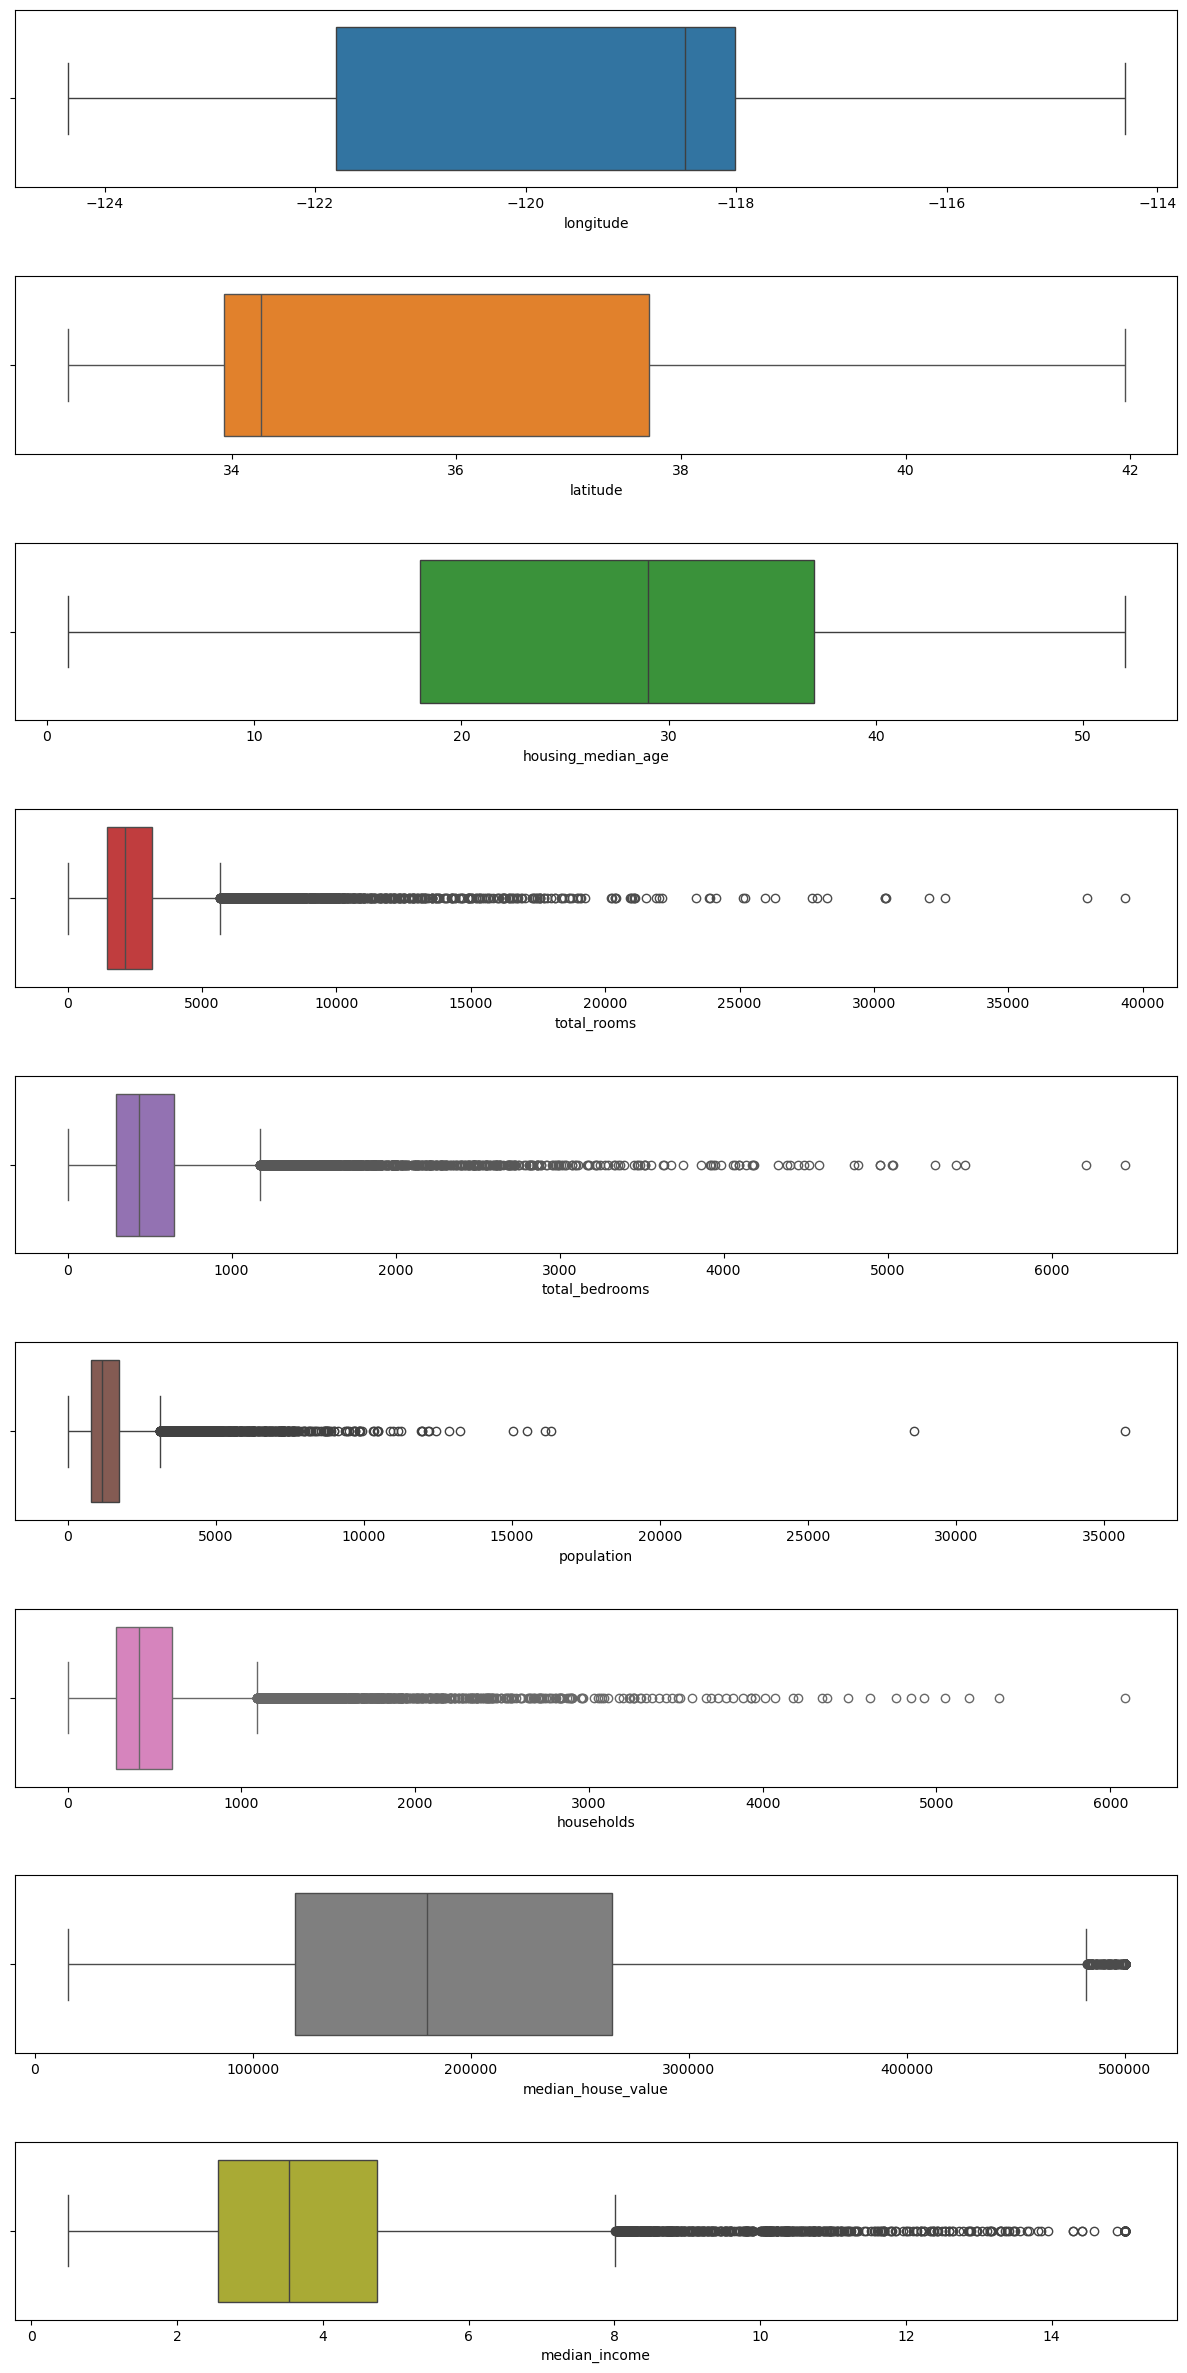

In [804]:
columnas = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_house_value', 'median_income']

fig, ax = plt.subplots(nrows = 9, ncols=1, figsize=(15, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas):
    sns.boxplot(x=df[col], ax=ax[i], color=f'C{i}')

In [805]:
len(df[df['total_rooms']>20000])

33

In [806]:
len(df[df['total_bedrooms']>4000])

26

In [807]:
len(df[df['population']>15000])

6

In [808]:
len(df[df['households']>4000])

15

In [809]:
len(df[df['median_income']>15])

48

In [810]:
df_filtrado = df[(df['total_rooms']>20000) | 
                 (df['total_bedrooms']>4000) | 
                 (df['population']>15000) | 
                 (df['households']>4000) | 
                 (df['median_income']>15)]

df_filtrado.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
922,-121.92,37.53,7,28258,3864.0,12203,3701,8.4045,451100,1,0,0,0,0
1010,-121.73,37.68,17,20354,3493.0,8768,3293,5.4496,238900,0,1,0,0,0
1566,-121.96,37.74,2,200,20.0,25,9,15.0001,350000,1,0,0,0,0
3981,-118.60,34.19,16,14912,4183.0,5105,3302,2.8312,213900,1,0,0,0,0
4035,-118.52,34.17,20,17377,4457.0,7450,4204,3.2154,259600,1,0,0,0,0


Podemos observar que a partir de la longitud, la latitud y la edad media de la casa, los demás features tienen un gran número de valores atípicos, lo cual hace sentido ya que los costos en California son extremadamente variados.

### <font color= ##28af2e>Distribución de datos</font>

In [811]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [812]:
numericas = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                 'total_bedrooms', 'population', 'households', 'median_income']

categ = ['<1H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']

In [813]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

Podemos observar que la mayoría de features tienen una distribución casi normal, si no fuera por valores atípicos que nos jalan la cola casi siempre a la derecha, tienen sesgo positivo.

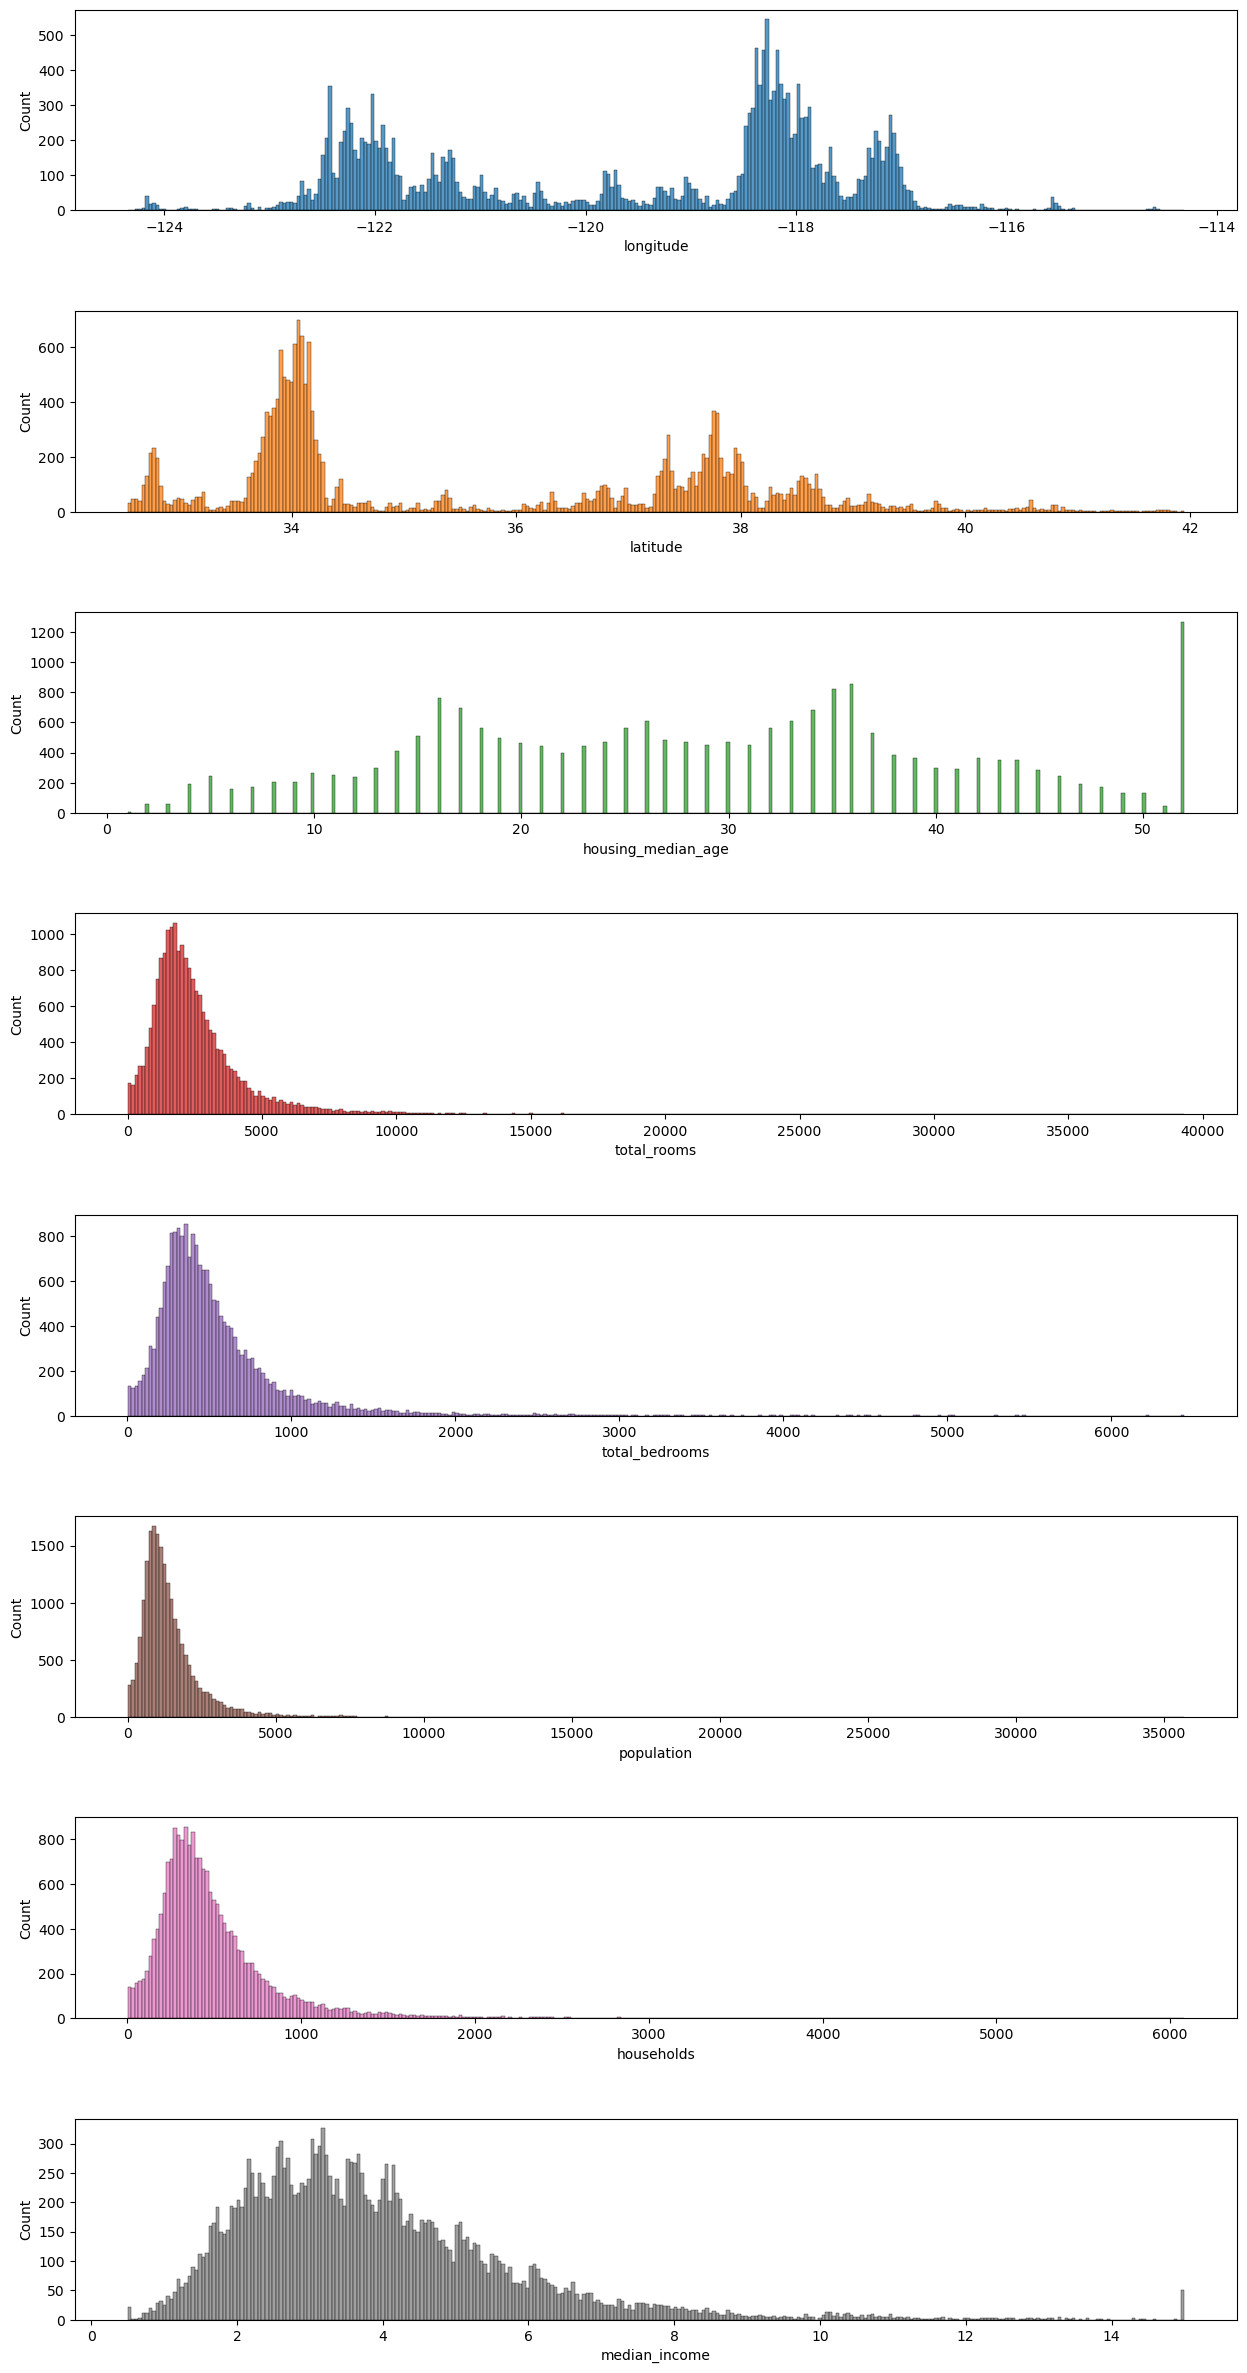

In [814]:
fig, ax = plt.subplots(nrows = 8, ncols=1, figsize=(15, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(numericas):
    sns.histplot(x=df[col], ax=ax[i], color=f'C{i}', bins=300)

En la siguiente representación podemos ver cuantas zonas se encuentran en cada región

C:\Users\esteb\AppData\Local\Temp\ipykernel_4336\2449751690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax[i], palette='summer')
C:\Users\esteb\AppData\Local\Temp\ipykernel_4336\2449751690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax[i], palette='summer')
C:\Users\esteb\AppData\Local\Temp\ipykernel_4336\2449751690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax[i], palette='summer')
C:\Users\esteb\AppData\Local\Temp\ipykernel_4336\2449751690.py:4: FutureWarning: 

Passi

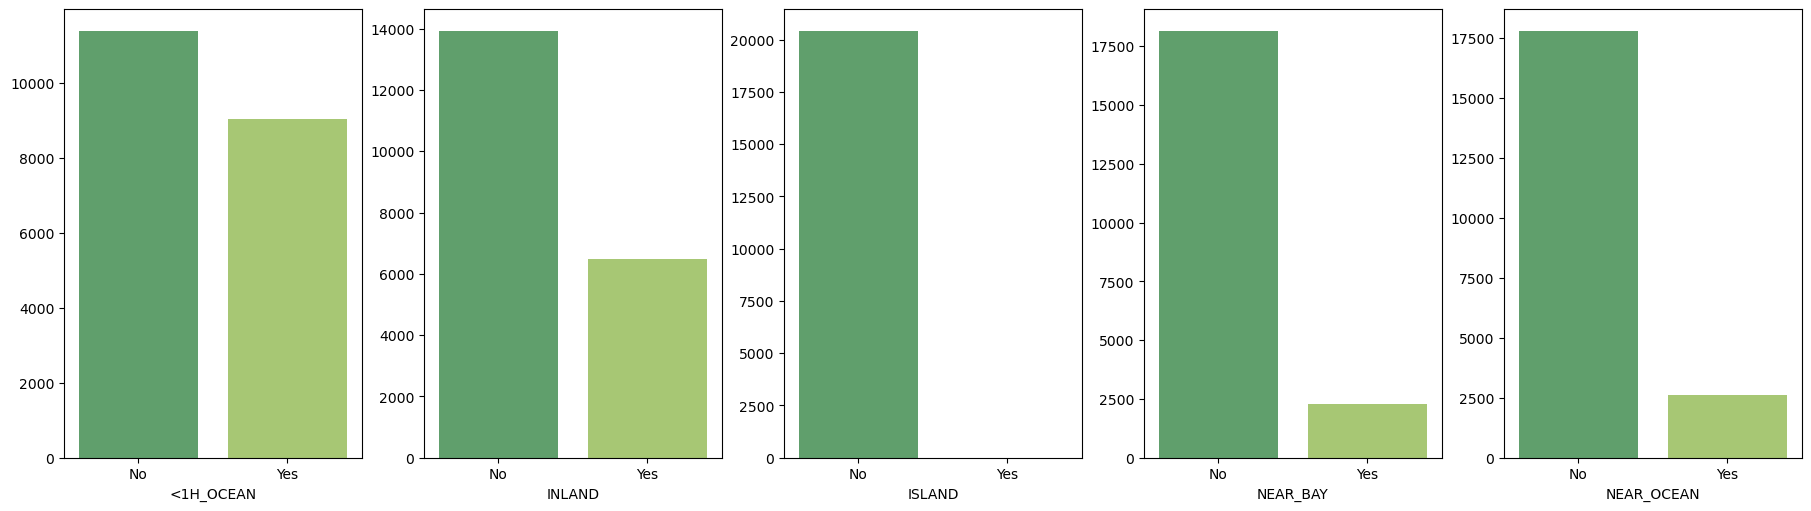

In [815]:
fig, ax = plt.subplots(figsize=(18, 5), nrows=1, ncols=5, layout='constrained')

for i, col in enumerate(categ):
    sns.countplot(x=df[col], ax=ax[i], palette='summer')
    ax[i].set_ylabel('')
    ax[i].set_xticks([0, 1], ['No', 'Yes'])

Finalmente vemos a continuación la distribución de nuestro target.

(array([   9.,   14.,   61.,  250.,  534.,  669.,  543.,  790.,  871.,
         704.,  809.,  709.,  826.,  806.,  908.,  947.,  777.,  813.,
         696.,  500.,  613.,  655.,  575.,  505.,  429.,  429.,  457.,
         327.,  315.,  214.,  222.,  230.,  241.,  249.,  286.,  190.,
         160.,  147.,  116.,  133.,  100.,   99.,   77.,   90.,  105.,
          66.,   47.,   50.,   47., 1023.]),
 array([ 14999.  ,  24699.04,  34399.08,  44099.12,  53799.16,  63499.2 ,
         73199.24,  82899.28,  92599.32, 102299.36, 111999.4 , 121699.44,
        131399.48, 141099.52, 150799.56, 160499.6 , 170199.64, 179899.68,
        189599.72, 199299.76, 208999.8 , 218699.84, 228399.88, 238099.92,
        247799.96, 257500.  , 267200.04, 276900.08, 286600.12, 296300.16,
        306000.2 , 315700.24, 325400.28, 335100.32, 344800.36, 354500.4 ,
        364200.44, 373900.48, 383600.52, 393300.56, 403000.6 , 412700.64,
        422400.68, 432100.72, 441800.76, 451500.8 , 461200.84, 470900.88,
        

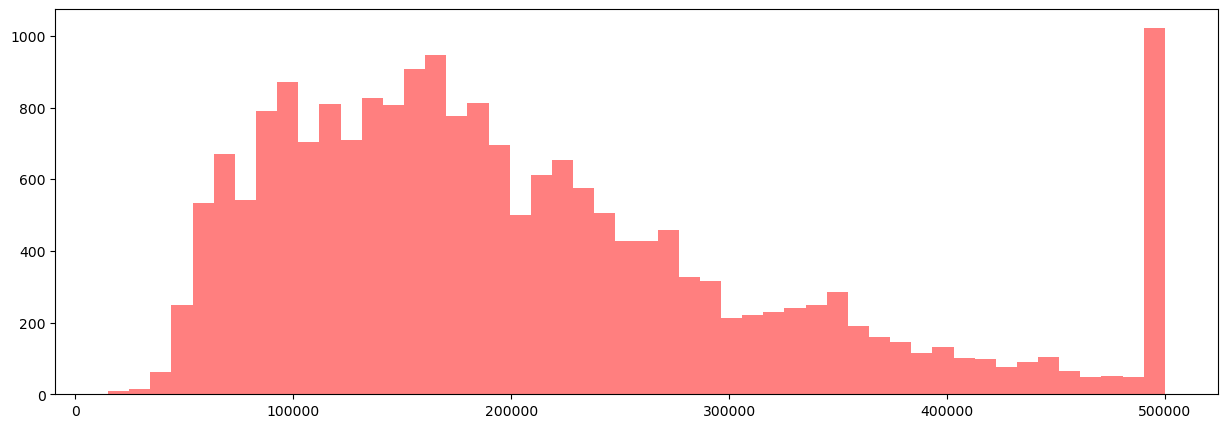

In [816]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(x=y, bins=50, alpha=0.5, color='r',)

### <font color= ##28af2e> Train / Test </font>

In [817]:
X_train0, X_test0, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = X[categ])

print("Tamaño del X-train:", X_train0.shape)
print("Tamaño del X-test:", X_test0.shape)
print("Tamaño del y-train:", y_train.shape)
print("Tamaño del y-test:", y_test.shape)

Tamaño del X-train: (16346, 13)
Tamaño del X-test: (4087, 13)
Tamaño del y-train: (16346,)
Tamaño del y-test: (4087,)


In [818]:
def conteo(data, cats):
    suma = []

    for col in cats:
        cont = len(data[data[col]==1])
        suma.append(cont)

    return pd.DataFrame(data=suma, columns=['Lugares'],  index=categ)

In [819]:
conteo(X_train0, categ)

,Lugares
<1H_OCEAN,7227
INLAND,5197
ISLAND,4
NEAR_BAY,1816
NEAR_OCEAN,2102


In [820]:
conteo(X_test0, categ)

,Lugares
<1H_OCEAN,1807
INLAND,1299
ISLAND,1
NEAR_BAY,454
NEAR_OCEAN,526


In [821]:
X_train0.index=np.arange(len(X_train0))
X_test0.index=np.arange(len(X_test0))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

In [822]:
scaler = StandardScaler()

In [823]:
long_lat1 = X_train0[["longitude", "latitude"]].sum(axis=1)
long_lat2 = X_test0[["longitude", "latitude"]].sum(axis=1)

long_lat_combined = pd.concat([long_lat1, long_lat2], axis=0).values.reshape(-1, 1)

long_lat_combined_scaled = scaler.fit_transform(long_lat_combined)

long_lat1_scaled = long_lat_combined_scaled[:len(long_lat1)]
long_lat2_scaled = long_lat_combined_scaled[len(long_lat1):]

In [824]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train0[numericas]), columns=numericas)
X_test_scaled = pd.DataFrame(scaler.transform(X_test0[numericas]), columns=numericas)

X_train = pd.concat([X_train_scaled, X_train0[categ]], axis=1)
X_test = pd.concat([X_test_scaled, X_test0[categ]], axis=1)

In [825]:
X_train['localization'] = long_lat1_scaled
X_test['localization'] = long_lat2_scaled

In [826]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,localization
0,-1.416056,0.921502,1.061300,-0.467911,-0.649492,-0.626121,-0.635902,0.990119,0,0,0,0,1,-1.059353
1,-0.756672,1.678954,0.504382,0.003051,-0.061610,-0.210008,-0.048717,-0.572752,0,1,0,0,0,2.551523
2,-1.196261,0.776557,-0.291216,1.288980,1.921607,1.168584,2.117346,-0.453047,1,0,0,0,0,-0.899689
3,-0.706719,0.949555,-1.007254,-0.938417,-0.975306,-0.974047,-0.998652,-0.905294,0,1,0,0,0,0.758367
4,0.846830,-0.817833,-1.007254,-0.760498,-0.852535,-0.933834,-0.818582,0.335177,1,0,0,0,0,-0.064520


In [827]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,localization
0,-1.416056,0.921502,1.061300,-0.467911,-0.649492,-0.626121,-0.635902,0.990119,0,0,0,0,1,-1.059353
1,-0.756672,1.678954,0.504382,0.003051,-0.061610,-0.210008,-0.048717,-0.572752,0,1,0,0,0,2.551523
2,-1.196261,0.776557,-0.291216,1.288980,1.921607,1.168584,2.117346,-0.453047,1,0,0,0,0,-0.899689
3,-0.706719,0.949555,-1.007254,-0.938417,-0.975306,-0.974047,-0.998652,-0.905294,0,1,0,0,0,0.758367
4,0.846830,-0.817833,-1.007254,-0.760498,-0.852535,-0.933834,-0.818582,0.335177,1,0,0,0,0,-0.064520


In [828]:
numericas.append('localization')
numericas

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'localization']

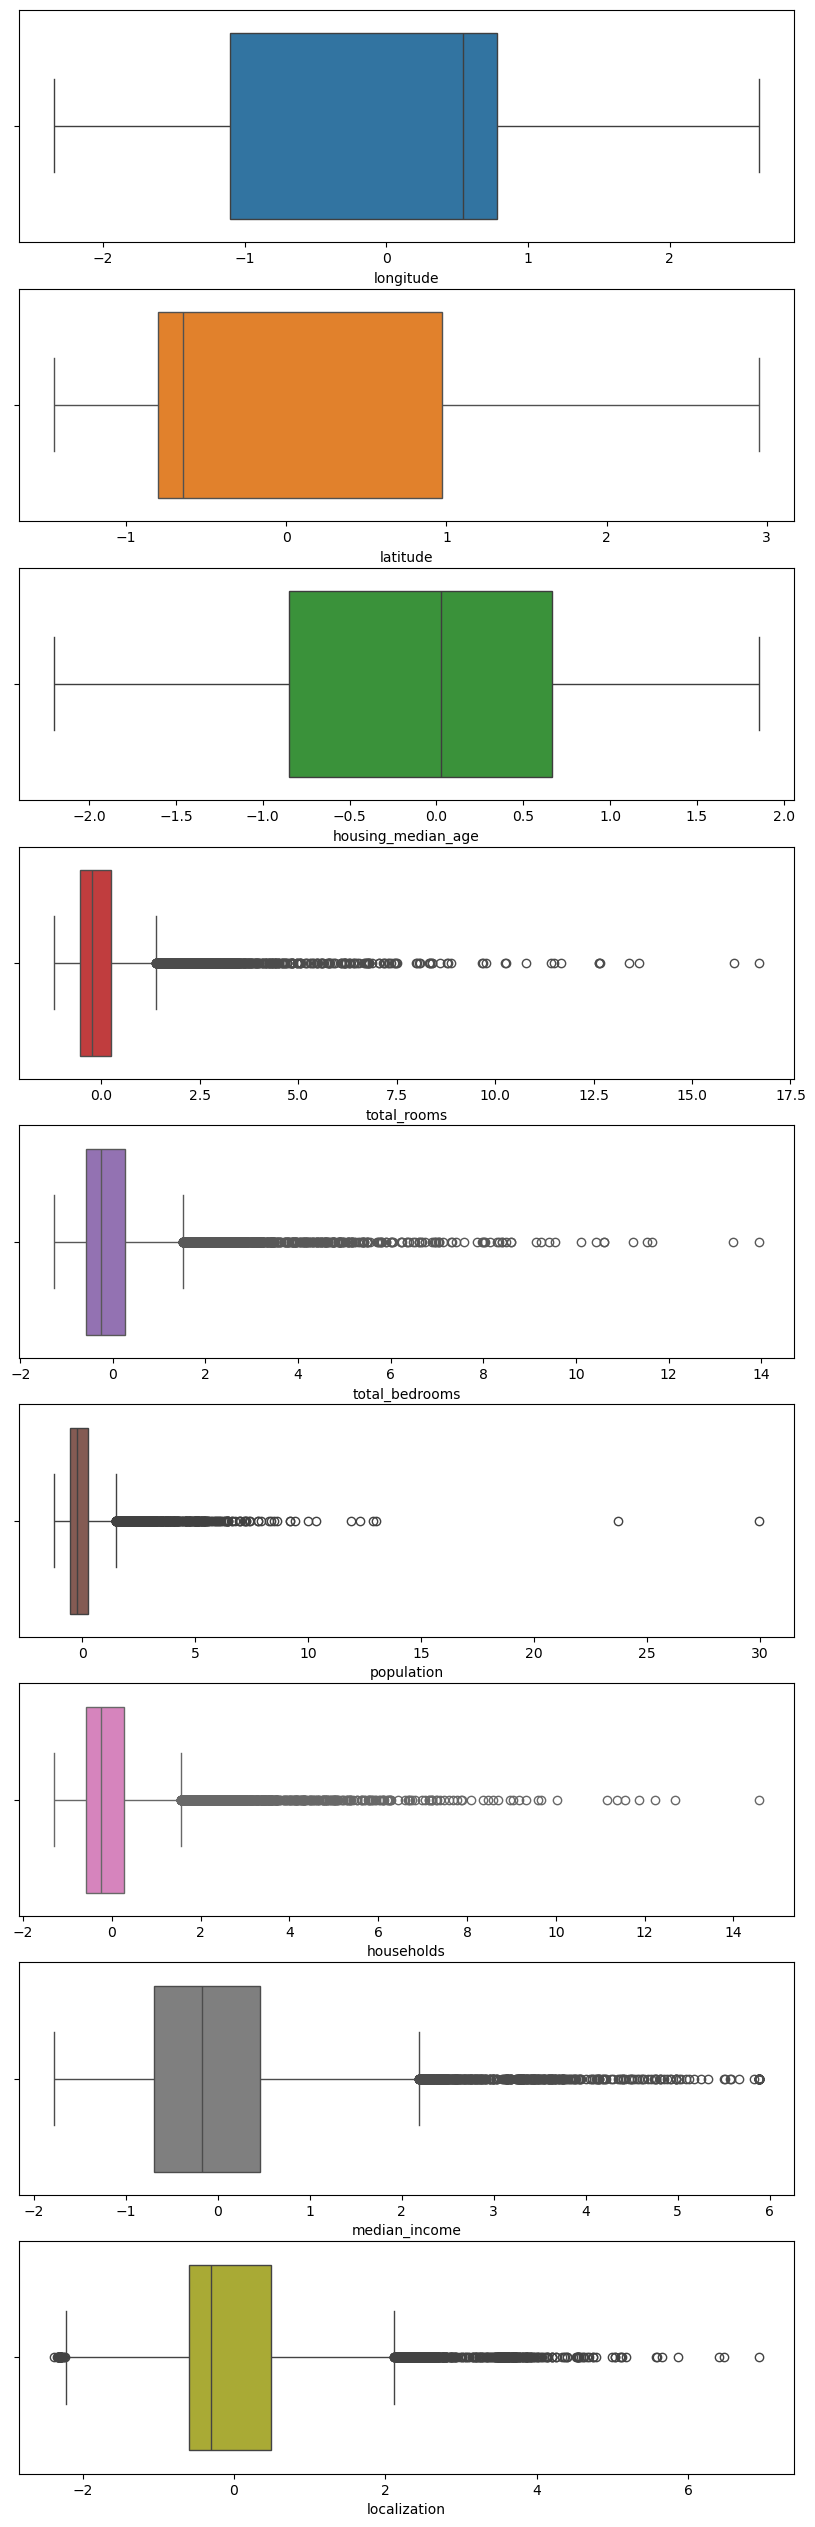

In [829]:
fig, ax = plt.subplots(9, 1, figsize=(10, 32))

for i, col in enumerate(numericas):
    sns.boxplot(ax=ax[i], data=X_train, x=col, color=f'C{i}')

In [830]:
len(X_train)

16346

In [776]:
X_train_filtrado = X_train[(X_train['total_rooms']>2) | 
                 (X_train['total_bedrooms']>2)| 
                 (X_train['population']>2) | 
                 (X_train['households']>2) | 
                 (X_train['median_income']>3) |
                 (X_train['localization']>3)]
len(X_train_filtrado)

1376

In [831]:
X_train.drop(index=X_train_filtrado.index, inplace=True)
len(X_train)

14970

In [832]:
y_train.drop(index=X_train_filtrado.index, inplace=True)
len(y_train)

14970

In [834]:
X_train.index=np.arange(len(X_train))
y_train.index=np.arange(len(y_train))

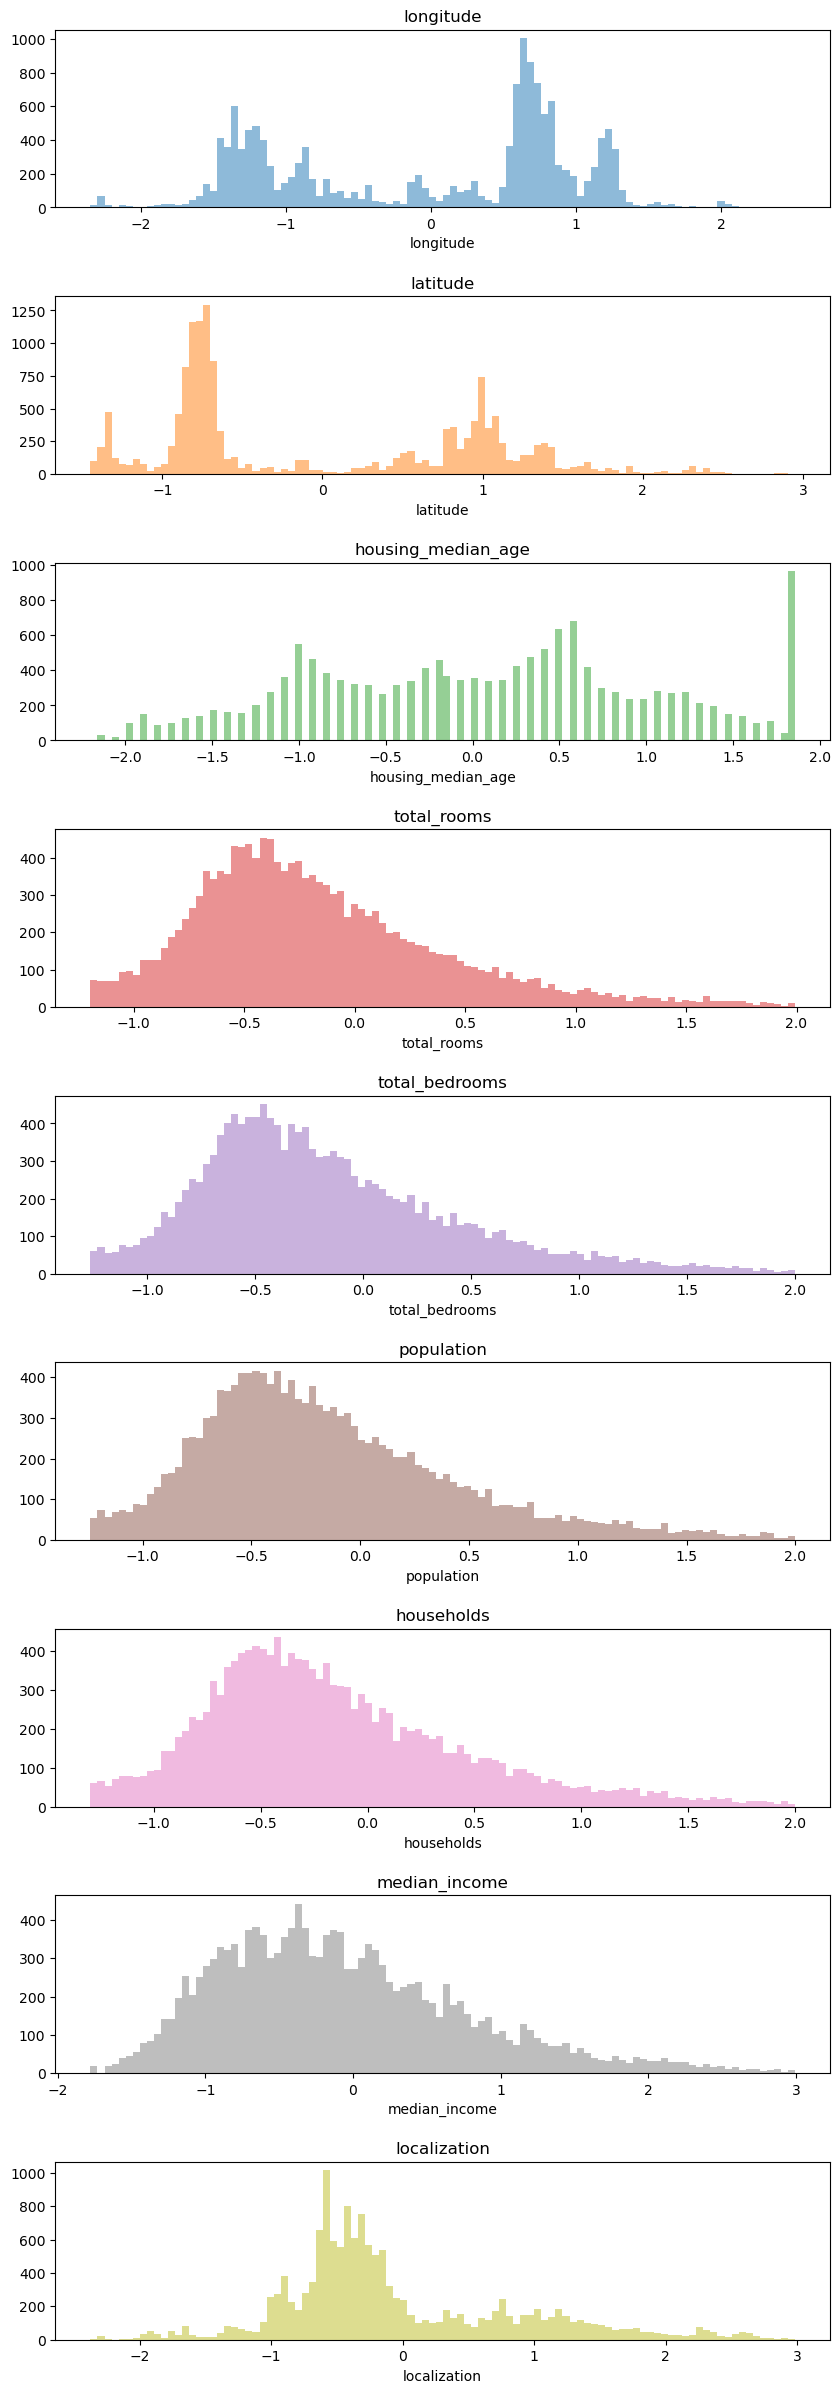

In [835]:
fig, ax = plt.subplots(9, 1, figsize=(10, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(numericas):
    hist = sns.histplot(x=X_train[col], bins=100, color=f'C{i}', ax=ax[i], alpha=0.5, edgecolor=None)
    ax[i].set_title(col)
    ax[i].set_ylabel('')

### <font color= ##28af2e>Correlación de datos</font>

Text(0.5, 1.0, 'Correlación de variables')

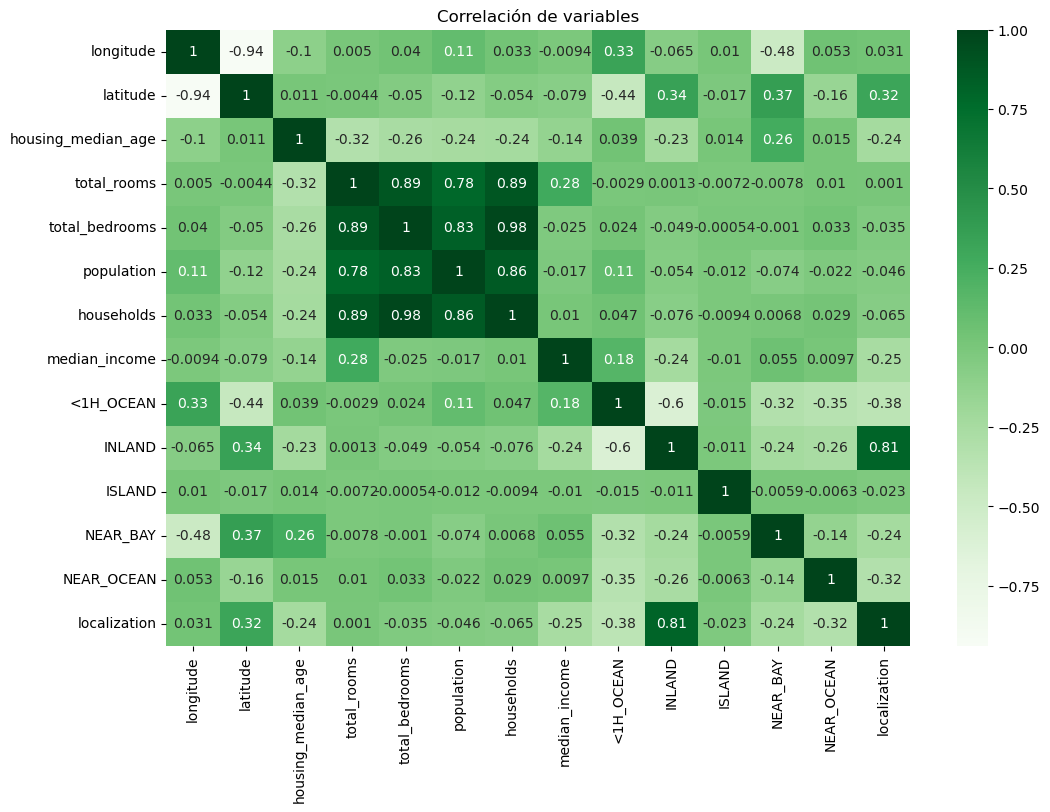

In [836]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='Greens')
ax.set_title('Correlación de variables')

In [837]:
def calcDrop(res):

    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    

    poss_drop = list(set(res['drop'].tolist()))


    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop


def corrX_new(df, cut=0.6):
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis=1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = list()
    results = []
    
    for row in range(len(up) - 1):
        col_idx = row + 1
        for col in range(col_idx, len(up)):
            if corr_mtx.iloc[row, col] > cut:
                if avg_corr.iloc[row] > avg_corr.iloc[col]: 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([corr_mtx.index[row],
                               up.columns[col],
                               avg_corr[row],
                               avg_corr[col],
                               up.iloc[row, col],
                               drop],
                              index=['v1', 'v2', 'v1.target', 'v2.target', 'corr', 'drop'])
        
                results.append(s)
    

    res = pd.concat(results, axis=1).T.reset_index(drop=True)
    
    dropcols_names = calcDrop(res)
    
    return dropcols_names

drop = corrX_new(X_train)
print(drop)

['population', 'households', 'latitude', 'INLAND', 'total_bedrooms']


C:\Users\esteb\AppData\Local\Temp\ipykernel_4336\1208988273.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[row],
C:\Users\esteb\AppData\Local\Temp\ipykernel_4336\1208988273.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[col],


Eliminamos las variables más correlacionads entre si, excepto latitud, esto ya que nos interesa conocer también la latitud de las viviendas, lo que haremos es sumar la latitud con la longitud y sacar una nueva variable.

In [838]:
X_train_scaled = X_train.drop(columns = ['households', 'total_rooms', 'population', 'latitude', '<1H_OCEAN', "longitude"], axis=1)
X_test_scaled = X_test.drop(columns = ['households', 'total_rooms', 'population', 'latitude', '<1H_OCEAN', "longitude"], axis=1)
X_train_scaled.head()

,housing_median_age,total_bedrooms,median_income,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,localization
0,-0.609455,-0.505473,-0.907618,1,0,0,0,0.058299
1,0.663501,-0.337843,-0.486116,1,0,0,0,0.254809
2,1.538659,0.658487,-0.246548,0,0,0,0,-0.162775
3,-0.052537,-0.524360,0.577280,1,0,0,0,0.353064
4,-0.211656,-0.241044,-0.865199,1,0,0,0,1.188233


### <font color= ##28af2e>Relación entre variables</font> 

In [840]:
!pip install scipy
from scipy import stats

#### <font color= ##28af2e>Variables que conservamos</font> 

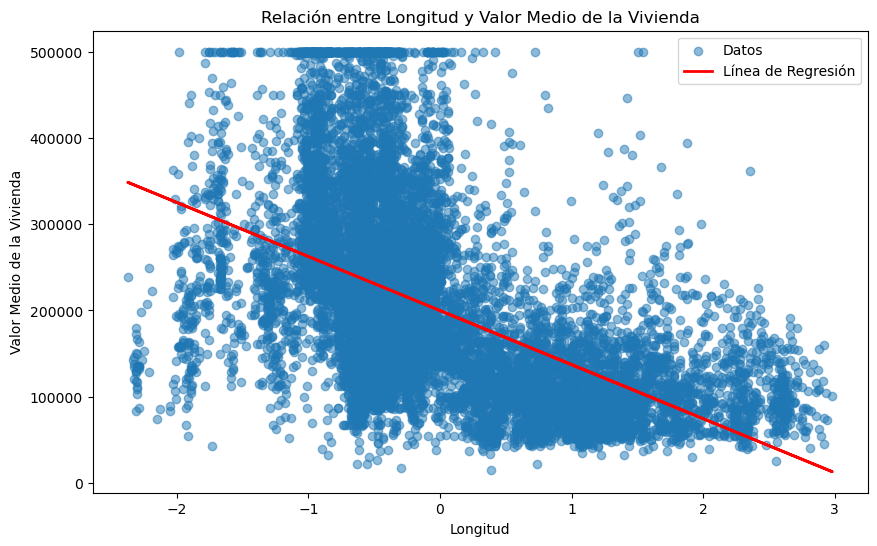

In [850]:
localizacion = X_train['localization']  
median_house_value = y_train 

pendiente, intercepto, r, p, std_err = stats.linregress(localizacion, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, localizacion))

plt.figure(figsize=(10, 6))
plt.scatter(localizacion, median_house_value, label='Datos', alpha=0.5)
plt.plot(localizacion, mymodel, color='r', label = 'Línea de Regresión', linewidth=2)
plt.title('Relación entre Longitud y Valor Medio de la Vivienda')
plt.xlabel('Longitud')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()

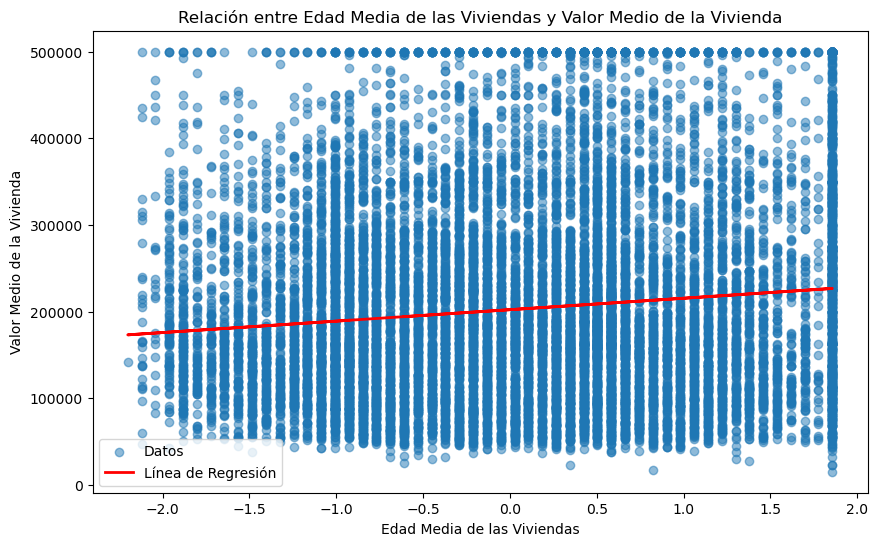

In [851]:
housing_median_age = X_train['housing_median_age']  

pendiente, intercepto, r, p, std_err = stats.linregress(housing_median_age, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, housing_median_age))

plt.figure(figsize=(10, 6))
plt.scatter(housing_median_age, median_house_value, label='Datos', alpha=0.5)
plt.plot(housing_median_age, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Edad Media de las Viviendas y Valor Medio de la Vivienda')
plt.xlabel('Edad Media de las Viviendas')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()

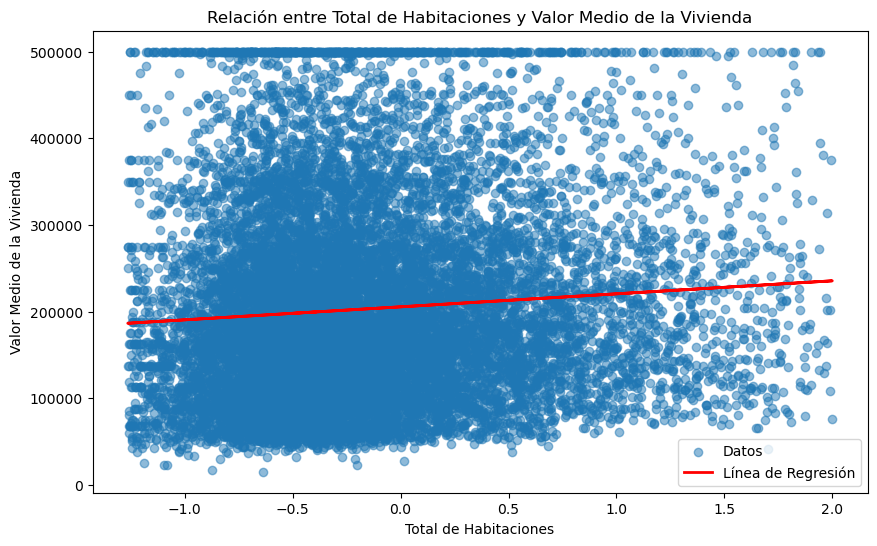

In [852]:
total_bedrooms = X_train['total_bedrooms']  

pendiente, intercepto, r, p, std_err = stats.linregress(total_bedrooms, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, total_bedrooms))

plt.figure(figsize=(10, 6))
plt.scatter(total_bedrooms, median_house_value, label='Datos', alpha=0.5)
plt.plot(total_bedrooms, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Total de Habitaciones y Valor Medio de la Vivienda')
plt.xlabel('Total de Habitaciones')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()


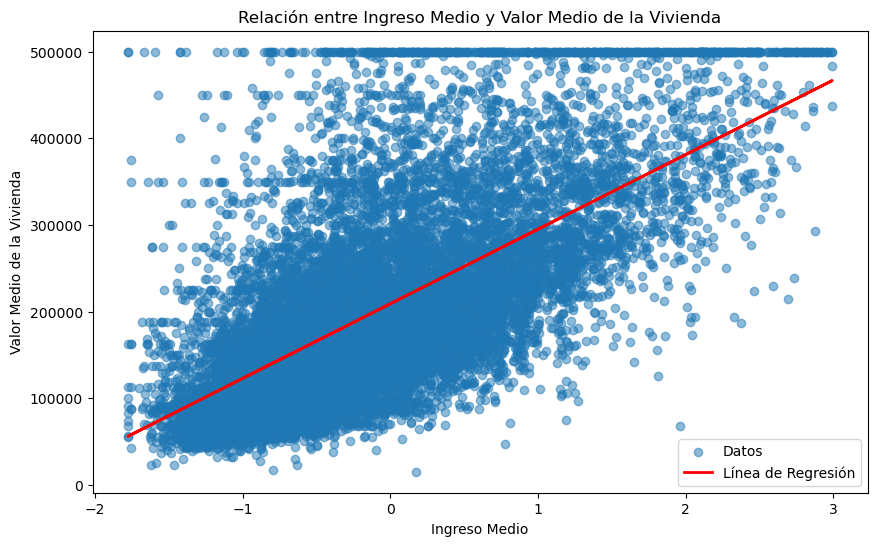

In [853]:
median_income = X_train['median_income']

pendiente, intercepto, r, p, std_err = stats.linregress(median_income, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, median_income))

plt.figure(figsize=(10, 6))
plt.scatter(median_income, median_house_value, label='Datos', alpha=0.5)
plt.plot(median_income, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Ingreso Medio y Valor Medio de la Vivienda')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()


#### <font color= ##28af2e>Variables que no conservamos</font> 

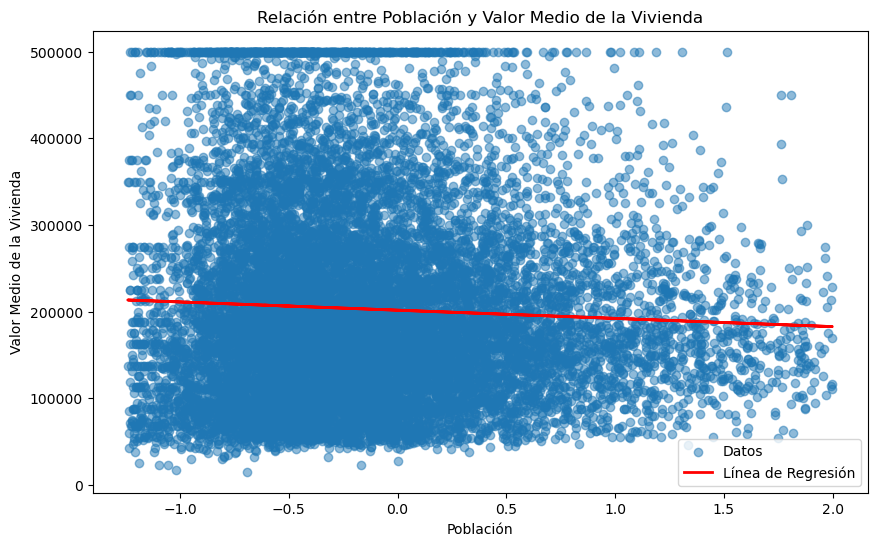

In [854]:
population = X_train['population']  

pendiente, intercepto, r, p, std_err = stats.linregress(population, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, population))

plt.figure(figsize=(10, 6))
plt.scatter(population, median_house_value, label='Datos', alpha=0.5)
plt.plot(population, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Población y Valor Medio de la Vivienda')
plt.xlabel('Población')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()


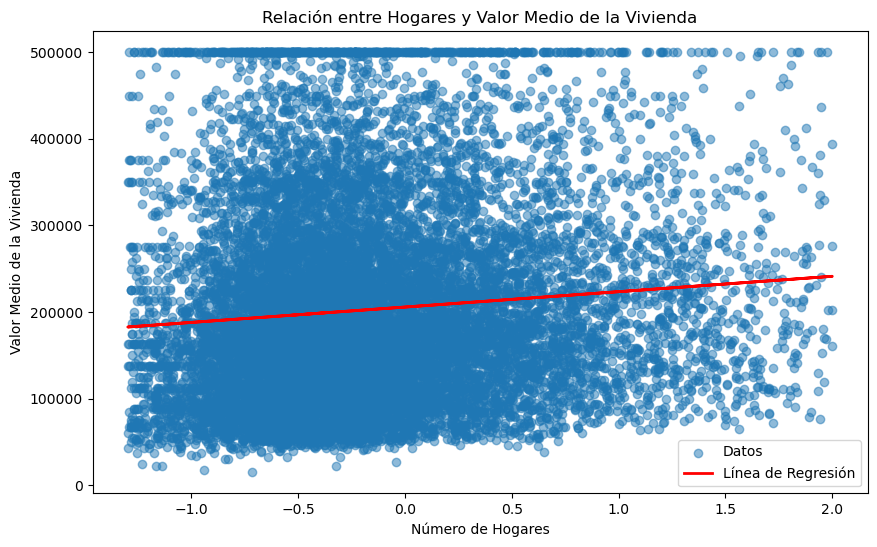

In [855]:
households = X_train['households']  

pendiente, intercepto, r, p, std_err = stats.linregress(households, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, households))

plt.figure(figsize=(10, 6))
plt.scatter(households, median_house_value, label='Datos', alpha=0.5)
plt.plot(households, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Hogares y Valor Medio de la Vivienda')
plt.xlabel('Número de Hogares')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()


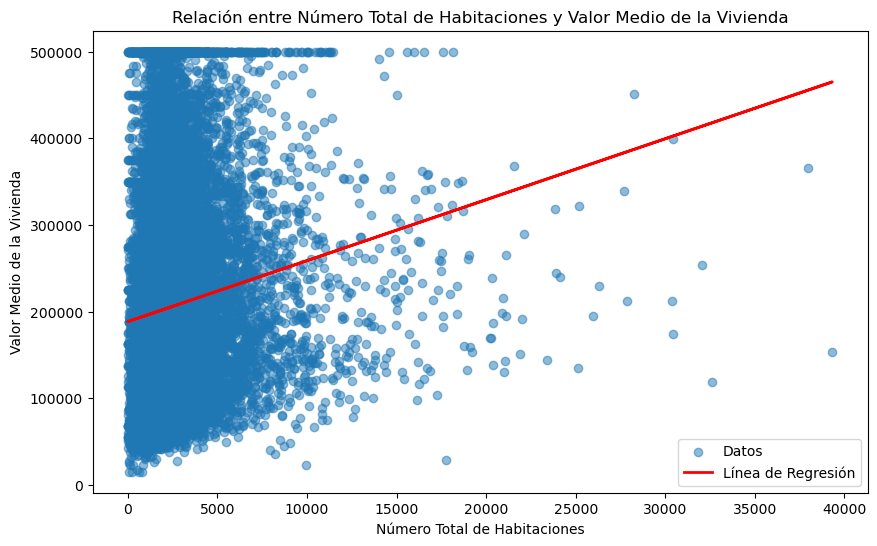

In [ ]:
total_rooms = df['total_rooms']  
median_house_value = df['median_house_value'] 

pendiente, intercepto, r, p, std_err = stats.linregress(total_rooms, median_house_value)

def linReg(x):
    return pendiente * x + intercepto

mymodel = list(map(linReg, total_rooms))

plt.figure(figsize=(10, 6))
plt.scatter(total_rooms, median_house_value, label='Datos', alpha=0.5)
plt.plot(total_rooms, mymodel, 'r', label='Línea de Regresión', linewidth=2)
plt.title('Relación entre Número Total de Habitaciones y Valor Medio de la Vivienda')
plt.xlabel('Número Total de Habitaciones')
plt.ylabel('Valor Medio de la Vivienda')
plt.legend()
plt.show()


Podemos observar que las variables no tiene gran línea de regresión más que el ingreso medio y el valor de la vivienda, donde se puede observar que entre más ingreso medio, aumenta el valor medio de la vivienda.

## <font color= ##28af2e> Entrega 2: Eleccion de modelo </font>

### <font color= ##28af2e> Procesar Modelo de Regresión </font>

El conjunto de datos contiene varios valores atípicos, especialmente en la variable objetivo median_house_value. Esto refleja la realidad del mercado inmobiliario en California, donde los precios varían drásticamente según la ubicación.

Aunque algunas variables como median_income muestran una relación lineal clara con el valor de las viviendas, otras características como el número de habitaciones (total_rooms) o la edad de las viviendas (housing_median_age) no tienen correlaciones fuertes con el precio.

Muchas de las distribuciones de las variables numéricas, como median_income, se aproximan a una distribución normal. Sin embargo, los valores atípicos en varias de estas columnas desvían la media y pueden afectar los resultados de los modelos si no se tratan adecuadamente.

El dataset es relativamente grande, lo que es útil para entrenar modelos de predicción grandes. Sin embargo, también implica un mayor esfuerzo de limpieza y preprocesamiento para asegurar que los valores atípicos y los datos faltantes no hagan sesgos.

La variable categórica ocean_proximity sugiere que la cercanía al océano es un factor relevante. Áreas cerca del mar suelen tener precios más altos.
</p>

<p style="text-align: justify;">

Creemos que el mejor modelo para aplicarlo a un data set de regresión lineal es la misma regresión lineal, esto debido a que permite tener una idea de la relación que existe entre las variables predictoras y el precio de las viviendas en California, sin embargo son pocas las variables relacionadas con el target linealmente.

Otro modelo contemplado para este data set es el de árboles de decisión, especialmente los bosques aleatorios (Random Forests), estos modelos robustos capturan relaciones no lineales y manejan bien las interacciones entre las variables. Los Random Forests pueden resultar útiles para este dataset, esto ya que manejan bien la alta dimensionalidad y reduce el riesgo de overfitting.

También podemos utilizaremos XGBoost ya que es rápido y eficiente para conjuntos de datos grandes, captura interacciones complejas y no lineales, evita el sobreajuste y evalúa la importancia de las características predictivas.

Finalmente usaremos también SVR, con el fin de modelar la relación entre las variables y los precios de vivienda, capturando patrones no lineales con un margen que minimiza errores. Se evita el sobreajuste y logrando predicciones precisas en datos complejos.


Vamos a comparar 4 tipos de modelos para aplicar a nuestra regresión lineal

In [856]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [141]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

KeyboardInterrupt: 

### <font color= ##28af2e>Comparación de modelos

#### <font color= ##28af2e>SVR

In [139]:
svr = SVR()
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 13941613944.80761
Mean Absolute Error (MAE): 87960.7033638124
R^2 Score: -0.04834539991613385


#### <font color= ##28af2e>Linear Regression

In [140]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

y_pred = linear.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 4768840152.888135
Mean Absolute Error (MAE): 50953.43730930363
R^2 Score: 0.6414051015178488


#### <font color= ##28af2e>XGB Regressor

In [141]:
import xgboost as xgb

In [142]:
modelo = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
modelo.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [143]:
import sklearn.metrics as metrics

y_hat= modelo.predict(X_test_scaled)

r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
mae = metrics.mean_absolute_error(y_test, y_hat)

print("Mean Squared Error (MSE)",mse)
print("Mean Absolute Error (MAE):",mae)
print('R^2 Score:',r2)

Mean Squared Error (MSE) 3416078812.9346337
Mean Absolute Error (MAE): 40827.19206860167
R^2 Score: 0.7431265115737915


#### <font color= ##28af2e>Random Forest Regressor

In [144]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 3497599131.8082395
Mean Absolute Error (MAE): 41237.5914656227
R^2 Score: 0.7369965934290235


<p style="text-align: justify;">
El MAE es mejor para el dataset de California Housing ya que existen muchos atípicos, ya que mide el error promedio en valores absolutos, sin penalizar de forma desproporcionada los errores grandes, como lo hace el MSE. Esto hace que el MAE sea mejor frente a valores extremos, que suelen ser comunes en datos de precios de vivienda. Además, el MAE es fácil de interpretar, ya que está en las mismas unidades que la variable objetivo, lo que nos ayuda a comprender el error promedio del modelo de manera directa.
<p\>

Aunque el XGBRegressor y Random Forest Regressor tienen casi el mismo MAE, el Random Forest Regressor tiene poco menos de MAE, por lo que el mejor modelo para este dataset es Random Forest Regressor.

Utilizaremos el punto 6

#### <font color= ##28af2e>Incluir hiper parámetros 

#### <font color= ##28af2e>SVR

In [145]:
parametros = {
    'C': [0.1, 1, 10, 100],            
    'kernel': ['linear', 'rbf'],       
    'gamma': ['scale', 'auto'],       
    'epsilon': [0.1, 0.2, 0.3]    
}

In [146]:
'''
grid_search = GridSearchCV(svr, parametros, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train) 

mejores_param = grid_search.best_params_
print("Mejores parámetros encontrados:", mejores_param) 
'''

# Este código tardó 65 minutos en cargar

'\ngrid_search = GridSearchCV(svr, parametros, cv=5, scoring=\'neg_mean_squared_error\')\n\ngrid_search.fit(X_train_scaled, y_train) \n\nmejores_param = grid_search.best_params_\nprint("Mejores parámetros encontrados:", mejores_param) \n'

grid_search = {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [147]:
params = {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

svr = SVR(C=params['C'], epsilon=params['epsilon'], gamma=params['gamma'], kernel=params['kernel'])

svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 5122141597.913812
Mean Absolute Error (MAE): 49834.60084714043
R^2 Score: 0.614838453915737


#### <font color= ##28af2e>Linear Regression

In [148]:
params = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(estimator=linear, param_grid=params, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_linear = grid_search.best_estimator_

y_pred = best_linear.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mejor hiperparámetro:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mejor hiperparámetro: {'fit_intercept': True}
Mean Squared Error (MSE): 4768840152.888135
Mean Absolute Error (MAE): 50953.43730930363
R^2 Score: 0.6414051015178488


Podemos ver que la regresión lineal incluso con los hiperparámetros no cambia, lo que nos da la conclusión que para este data set específico, la regresión lineal no es la mejor opción.

#### <font color= ##28af2e>XGBoost

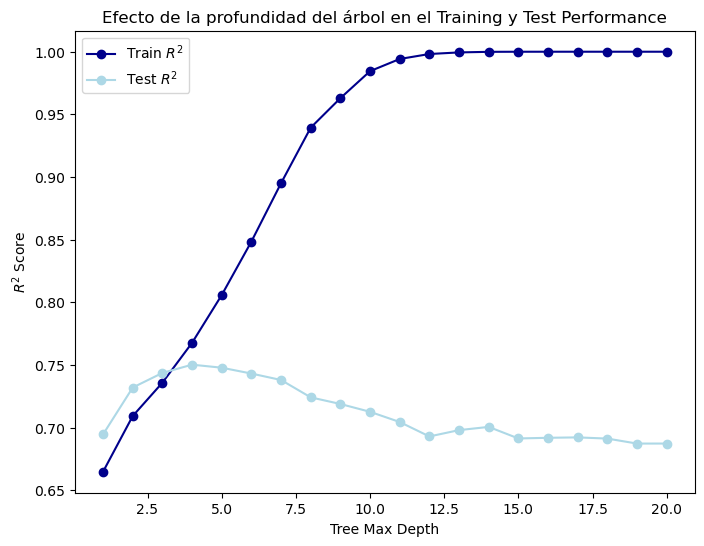

In [149]:
max_depths = range(1, 21)
train_scores = []
test_scores = []

for max_depth in max_depths:   
    tree_reg = xgb.XGBRegressor(max_depth=max_depth, objective='reg:squarederror', seed=42)
    tree_reg.fit(X_train_scaled, y_train)
    train_scores.append(tree_reg.score(X_train_scaled, y_train))
    test_scores.append(tree_reg.score(X_test_scaled, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train $R^2$',color='darkblue',  marker='o')
plt.plot(max_depths, test_scores, label='Test $R^2$', color='lightblue', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la profundidad del árbol en el Training y Test Performance')
plt.legend()
plt.show()

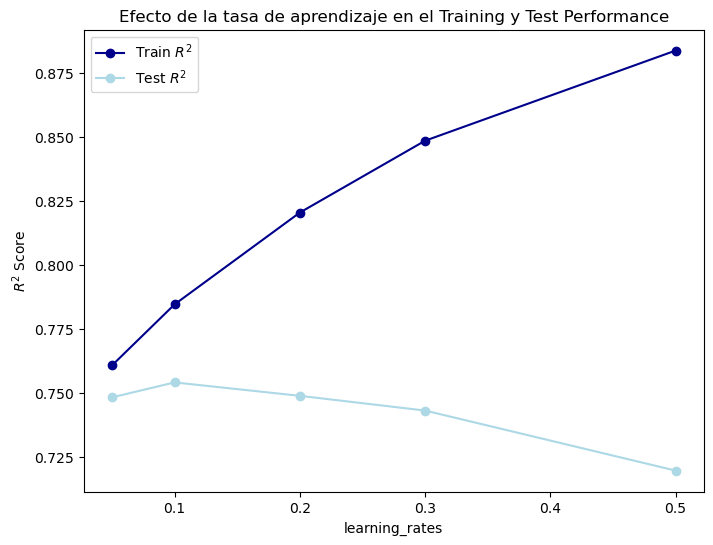

In [150]:
learning_rates = [0.05, 0.1, 0.2, 0.3, 0.5]
train_scores = []
test_scores = []

for learning_rate in learning_rates:   
    tree_reg = xgb.XGBRegressor(learning_rate=learning_rate, objective='reg:squarederror', seed=42)
    tree_reg.fit(X_train_scaled, y_train)
    train_scores.append(tree_reg.score(X_train_scaled, y_train))
    test_scores.append(tree_reg.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 6))
plt.plot(learning_rates, train_scores, label='Train $R^2$', color='darkblue', marker='o')
plt.plot(learning_rates, test_scores, label='Test $R^2$', color='lightblue', marker='o')
plt.xlabel('learning_rates')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la tasa de aprendizaje en el Training y Test Performance')
plt.legend()
plt.show()

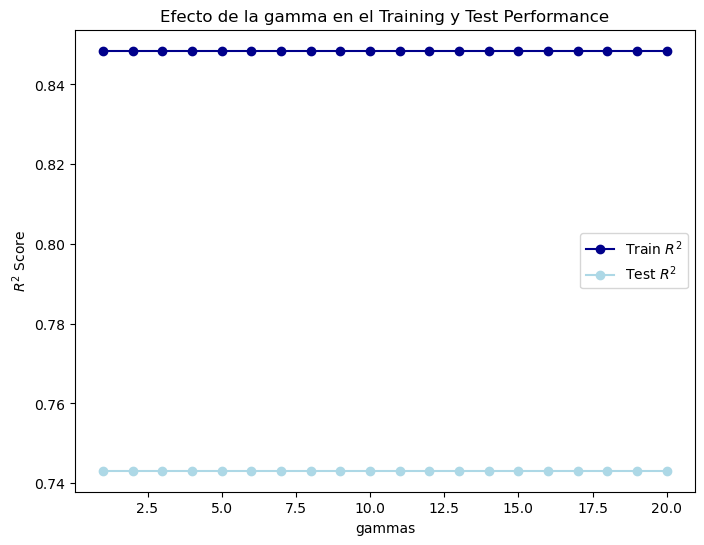

In [151]:
gammas = range(1, 21)
train_scores = []
test_scores = []

for gamma in gammas:   
    tree_reg = xgb.XGBRegressor(gamma=gamma, objective='reg:squarederror', seed=42)
    tree_reg.fit(X_train_scaled, y_train)
    train_scores.append(tree_reg.score(X_train_scaled, y_train))
    test_scores.append(tree_reg.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 6))
plt.plot(gammas, train_scores, label='Train $R^2$', color='darkblue', marker='o')
plt.plot(gammas, test_scores, label='Test $R^2$', color='lightblue', marker='o')
plt.xlabel('gammas')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de la gamma en el Training y Test Performance')
plt.legend()
plt.show()

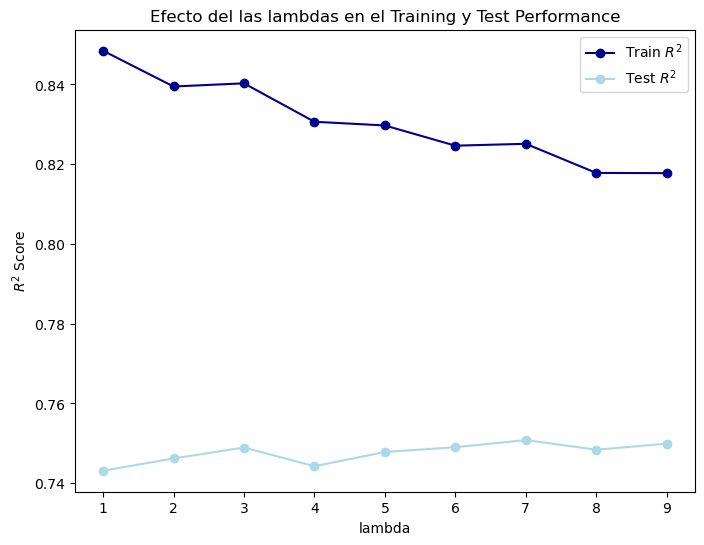

In [152]:
lambdas = range(1, 10)
train_scores = []
test_scores = []

for l in lambdas:
    tree_reg = xgb.XGBRegressor(reg_lambda=l, objective='reg:squarederror', seed=42)
    tree_reg.fit(X_train_scaled, y_train)
    train_scores.append(tree_reg.score(X_train_scaled, y_train))
    test_scores.append(tree_reg.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_scores, label='Train $R^2$', color='darkblue', marker='o')
plt.plot(lambdas, test_scores, label='Test $R^2$', color='lightblue', marker='o')
plt.xlabel('lambda')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del las lambdas en el Training y Test Performance')
plt.legend()
plt.show()

In [153]:
gbm_param_grid = {
     'reg_lambda': [5, 6, 7] , 
     'gamma': [8, 9, 10, 11, 12],
     'learning_rate': [0.05, 0.1, 0.2],
     'max_depth': [1, 2, 3, 4, 5]
}
gbm = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 2, verbose = 1)

grid_mse.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


c:\Users\esteb\anaconda3\envs\tsflow\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [8, 9, 10, 11, 12],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5],
                         'reg_lambda': [5, 6, 7]},
             scoring='neg_mean_squared_error', verbose=1)

In [154]:
print("Mejores hiperparámetros encontrados: ",grid_mse.best_params_)

Mejores hiperparámetros encontrados:  {'gamma': 8, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 6}


In [155]:
modelo_nuevo = xgb.XGBRegressor(objective='reg:squarederror',
                           seed=42,
                           max_depth=5,
                           gamma=8,
                           learning_rate=0.2,
                           reg_lambda=5)

modelo_nuevo.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=8, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [156]:
y_hat= modelo_nuevo.predict(X_test_scaled)

r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
mae = metrics.mean_absolute_error(y_test,y_hat)
                                 
print('R^2:',r2)
print("MSE:",mse)
print("MAE:", mae)

R^2: 0.753048300743103
MSE: 3284132259.3372183
MAE: 40283.208495496394


Mejoraron poco las métricas, sin embargo no logran superar al Random Forest Regressor

#### <font color= ##28af2e>Random Forest Regressor

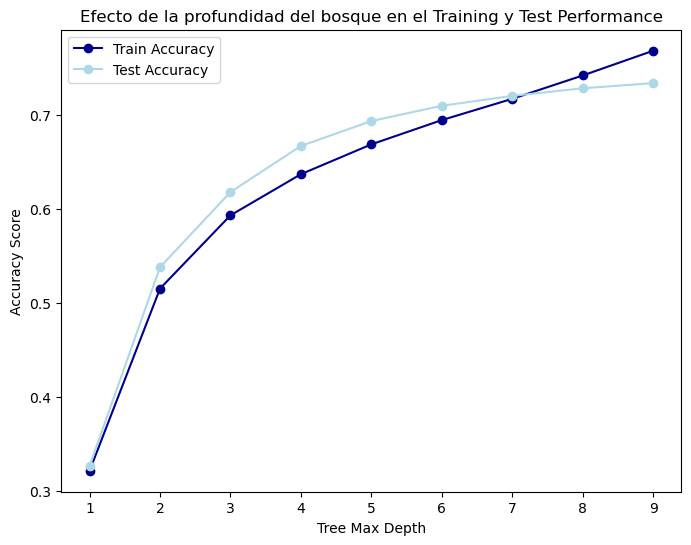

In [157]:
max_depths = range(1, 10)
train_scores = []
test_scores = []

for max_depth in max_depths:
    tree_clas = RandomForestRegressor(max_depth=max_depth, random_state=42)
    tree_clas.fit(X_train_scaled, y_train)
    train_scores.append(tree_clas.score(X_train_scaled, y_train))
    test_scores.append(tree_clas.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train Accuracy', color='darkblue', marker='o')
plt.plot(max_depths, test_scores, label='Test Accuracy', color='lightblue', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

In [158]:
min_samples_splits = range(2, 30)
train_scores = []
test_scores = []

for min_samples_split in min_samples_splits:
    tree_clas = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    tree_clas.fit(X_train_scaled, y_train)
    train_scores.append(tree_clas.score(X_train_scaled, y_train))
    test_scores.append(tree_clas.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_scores, label='Train Accuracy', color='darkblue', marker='o')
plt.plot(min_samples_splits, test_scores, label='Test Accuracy', color='lightblue', marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('Accuracy Score')
plt.title('Efecto del min. numero de observaciones por split en el Training y Test Performance')
plt.legend()
plt.show()

KeyboardInterrupt: 

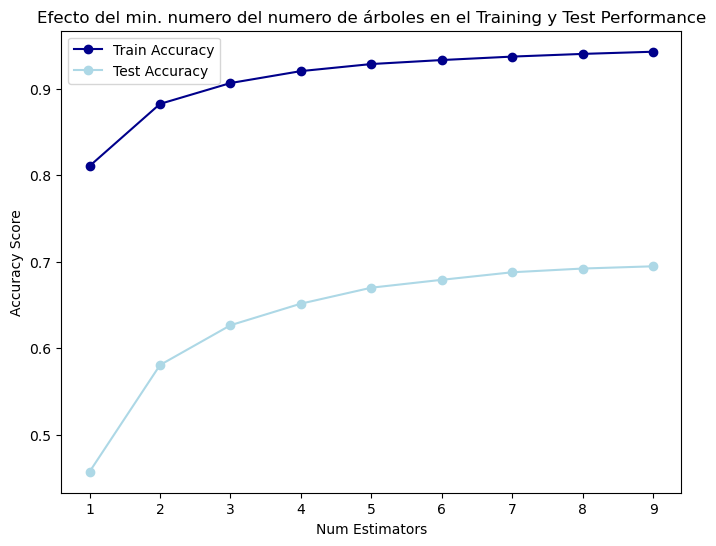

In [331]:
n_estimators = range(1, 10)
train_scores = []
test_scores = []

for n_estimator in n_estimators:
    tree_clas = RandomForestRegressor(n_estimators=n_estimator, random_state=42)
    tree_clas.fit(X_train_scaled, y_train)
    train_scores.append(tree_clas.score(X_train_scaled, y_train))
    test_scores.append(tree_clas.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_scores, label='Train Accuracy', color='darkblue', marker='o')
plt.plot(n_estimators, test_scores, label='Test Accuracy', color='lightblue', marker='o')
plt.xlabel('Num Estimators')
plt.ylabel('Accuracy Score')
plt.title('Efecto del min. numero del numero de árboles en el Training y Test Performance')
plt.legend()
plt.show()

In [332]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(
    criterion='squared_error',  
    min_samples_leaf=2,
    bootstrap=True,
    oob_score=False,
    random_state=0,
    verbose=0
)

param_grid = {
    'max_depth': [5, 6, 7, 8], 
    'min_samples_split': range(2, 10), 
    'n_estimators': [5, 6, 7, 8]
}

gs = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=2,
    scoring='neg_mean_squared_error' 
)

gs.fit(X_train_scaled, y_train)

print("Mejores parámetros encontrados:", gs.best_params_)


Mejores parámetros encontrados: {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 8}


In [333]:
rfr2 = RandomForestRegressor(
    n_estimators=8,
    criterion='squared_error',
    max_depth=8,
    min_samples_split=8,
    min_samples_leaf=2,
    bootstrap=True,
    oob_score=False,
    random_state=0,
    verbose=0
)

rfr2.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=8, random_state=0)

In [334]:
y_pred = rfr2.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 4173549422.410911
Mean Absolute Error (MAE): 44681.056867519
R^2 Score: 0.6948084644943977


Podemos observar como el método que más nos ayuda para este data set es el de Random Forest Regressor, lo cual nos hace sentido siendo modelos robustos ante valores atípicos, este data set esta repleto de estos, asi como también reduce la varianza.

In [337]:
column_names = X_train_scaled.columns

n_samples = 100  
datos_nuevos = pd.DataFrame()

for col in column_names:
    min_val = X_train[col].min()
    max_val = X_train[col].max()
    datos_nuevos[col] = np.random.uniform(min_val, max_val, n_samples)

scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(datos_nuevos)

new_predictions = rf.predict(new_data_scaled)

datos_nuevos['Predicted_Target'] = new_predictions

datos_nuevos.head()


c:\ProgramData\Anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,housing_median_age,total_bedrooms,median_income,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN,localization,Predicted_Target
0,-0.117084,7.183645,3.159428,0.779301,0.879649,0.814758,0.622293,1.425044,155046.00
1,-0.981740,7.210277,0.888314,0.031034,0.308010,0.973358,0.145397,1.567140,107547.00
2,-0.286300,4.648546,3.869422,0.404901,0.072134,0.624429,0.647590,0.691491,263312.00
3,-1.175844,13.406197,5.166209,0.884625,0.086389,0.069430,0.800558,1.880821,256010.00
4,1.305626,13.574699,5.584837,0.923782,0.817889,0.575177,0.489539,-0.813001,466567.55


### <font color= ##28af2e>Discusión de los Resultados</font> 


<p style="text-align: justify;">

Nuestra hipótesis al comenzar el modelado, fue que Regresión Lineal sería el mejor modelo, pero estuvimos muy equivocados, aquí presentamos los resultados de cada una:

1. SVR: El modelo de SVR fue el más lento y tuvo un mal rendimiento en el dataset de California Housing. A pesar de ser efectivo en problemas no lineales, no manejó bien los outliers, lo que resultó en valores elevados de MAE y MSE. Además, el tiempo de entrenamiento fue considerablemente largo.

2. Regresión Lineal: La regresión lineal, aunque rápida, no fue adecuada para el dataset de California Housing. Su desempeño fue inferior debido a que esta limitada y es incapaz de capturar relaciones no lineales, lo que llevó a errores elevados en las predicciones.

3. XGBoost: XGBoost tuvo un buen desempeño, mejor que SVR y regresión lineal, pero tampoco sirvió tanto con los outliers en los datos. A pesar de ser eficaz para capturar grandes bases de datos como es el caso,el hecho de que el dataset tuviera valores atípicos limitó la precisión del modelo.

4. Random Forest Regressor: El Random Forest Regressor fue el modelo más robusto y preciso. Su capacidad para manejar outliers y reducir la varianza lo hizo ideal para este conjunto de datos, logrando un buena mejor precisión en las predicciones finales.
</p>


Las variables mas importantes fueron variables como median_income y no tanto las que mencionamo como la antiguedad de las casas, También incluimos todas las metricas de performance para nuestro proyecto, pero en la que nos terminamos basando y las que pensamos más ideales fueron MSE y MAE, pero sobre todo MAE porque estos fueron modelos muy robustos que representó mejor. 
